In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(c("Biostrings", "BSgenome.Celegans.UCSC.ce2","BSgenome"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: http://cran.rstudio.com/


Bioconductor version 3.12 (BiocManager 1.30.15), R 4.0.5 (2021-03-31)

Installing package(s) 'Biostrings', 'BSgenome.Celegans.UCSC.ce2', 'BSgenome'

also installing the dependencies ‘MatrixGenerics’, ‘Biobase’, ‘DelayedArray’, ‘SummarizedExperiment’, ‘zlibbioc’, ‘GenomeInfoDbData’, ‘GenomicAlignments’, ‘BiocParallel’, ‘Rhtslib’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘GenomicRanges’, ‘rtracklayer’, ‘Rsamtools’


Old packages: 'ade4', 'adegraphics', 'admisc', 'afex', 'agricolae', 'akima',
  'Amelia', 'animation', 'apcluster', 'ape', 'aplpack', 'aqp', 'arm', 'arrow',
  'arsenal', 'ARTool', 'arules', 'arulesViz', 'astsa', 'autocogs',
  'autothresholdr', 'backports', 'baguette', 'BAS', 'BayesFactor', 'bayesplot',
  'bayestestR', 'bbmle', 'bbotk', 'beeswarm', 'berryFunctions',
  'bestNormalize', 'BH', 'bibliometrix', 'b

# 1.1
R can generate numbers from all known distributions. We now know how to generate random discrete data using the specialized R functions tailored for each type of distribution. We use the functions that start with an r as in rXXXX, where XXXX could be pois, binom, multinom. If we need a theoretical computation of a probability under one of these models, we use the functions dXXXX, such as dbinom, which computes the probabilities of events in the discrete binomial distribution, and dnorm, which computes the probability density function for the continuous normal distribution. When computing tail probabilities such as $P(X>a)$ it is convenient to use the cumulative distribution functions, which are called pXXXX. Find two other discrete distributions that could replace the XXXX above.

- pbinom, pnorm

## 1.2
In this chapter we have concentrated on discrete random variables, where the probabilities are concentrated on a countable set of values. How would you calculate the probability mass at the value $X=2$ for a binomial $B(10, 0.3)$ with dbinom? Use dbinom to compute the cumulative distribution at the value 2, corresponding to 
$P(X \leq 2)$ and check your answer with another R function.

In [2]:
dbinom(2, size=10, prob=0.3)

[1] 0.2334744

In [3]:
pbinom(2, size=10, prob=0.3)

[1] 0.3827828

In [4]:
sum(dbinom(0:2, size=10, prob=0.3))

[1] 0.3827828

## 1.3
Whenever we note that we keep needing a certain sequence of commands, it’s good to put them into a function. The function body contains the instructions that we want to do over and over again, the function arguments take those things that we may want to vary. Write a function to compute the probability of having a maximum as big as m when looking across n Poisson variables with rate lambda.

In [5]:
poismax <- function(lambda, n, m) {
    e <- 1 - ppois(m-1, lambda)
    return(1 - exp(-n * e))
}
poismax(0.5, 100, 7)

[1] 0.0001002329

In [8]:
e100 = rpois(100,lambda=0.5)
poismax(mean(e100), 100, 7)

[1] 6.67165e-05

## 1.4
Rewrite the function to have default values for its arguments (i.e., values that are used by it if the argument is not specified in a call to the function).

In [9]:
poismax = function(lambda, n = 100, m = 7) {
  1 - exp( -n * (1 - ppois(m - 1, lambda)))
}
poismax(0.5)

[1] 0.0001002329

In [10]:
poismax(0.5, m=9)

[1] 3.43549e-07

## 1.5
In the epitope example, use a simulation to find the probability of having a maximum of 9 or larger in 100 trials. How many simulations do you need if you would like to prove that “the probability is smaller than 0.000001?”

In [20]:
n_simulation <- 1000000
n <- 100
m <- 9
maxes <- replicate(n_simulation, {max(rpois(100, 0.5))})
table(maxes)


maxes
     1      2      3      4      5      6      7      8      9 
    86 234561 604424 143823  15682   1315    100      8      1 

In [21]:
mean(maxes >= 9)

[1] 1e-06

## 1.7
Generate 100 instances of a Poisson(3) random variable. What is the mean? What is the variance as computed by the R function var?


In [22]:
p100 <- rpois(100, lambda=3)
mean(p100)

[1] 3.41

In [23]:
var(p100)

[1] 3.092828

## 1.8
*C. elegans* genome nucleotide frequency: Is the mitochondrial sequence of *C. elegans* consistent with a model of equally likely nucleotides?

a. Explore the nucleotide frequencies of chromosome M by using a dedicated function in the Biostrings package from Bioconductor.

b. Test whether the *C. elegans* data is consistent with the uniform model (all nucleotide frequencies the same) using a simulation. Hint: This is our opportunity to use Bioconductor for the first time. Since Bioconductor’s package management is more tightly controlled than CRAN’s, we need to use a special install function (from the BiocManager package) to install Bioconductor packages.

In [24]:
library("BSgenome.Celegans.UCSC.ce2")

Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attachi

In [25]:
Celegans

Worm genome:
# organism: Caenorhabditis elegans (Worm)
# genome: ce2
# provider: UCSC
# release date: Mar. 2004
# 7 sequences:
#   chrI   chrII  chrIII chrIV  chrV   chrX   chrM                              
# (use 'seqnames()' to see all the sequence names, use the '$' or '[[' operator
# to access a given sequence)

In [26]:
chrM <- Celegans$chrM

In [27]:
chrM

13794-letter DNAString object
seq: CAGTAAATAGTTTAATAAAAATATAGCATTTGGGTT...TATTTATAGATATATACTTTGTATATATCTATATTA

In [28]:
length(chrM)

[1] 13794

In [44]:
library(Biostrings)
letter_freqM <- letterFrequency(chrM, letters=c('A', 'C', 'T', 'G'))

In [45]:
letter_freqM

A    C    T    G 
4335 1225 6179 2055

In [31]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks Biostrings::collapse(), IRanges::collapse()
✖ dplyr::combine()    masks BiocGenerics::combine()
✖ purrr::compact()    masks XVector::compact()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks XVector::slice(), IRanges::slice()



In [46]:
letter_freqM_tibble <- tibble(nucleotide = names(letter_freqM), n = letter_freqM)
letter_freqM_tibble

nucleotide,n
<chr>,<int>
A,4335
C,1225
T,6179
G,2055


In [47]:
letter_freqM_tibble <- letter_freqM_tibble %>%
    mutate(Proportion = n / sum(n)) 

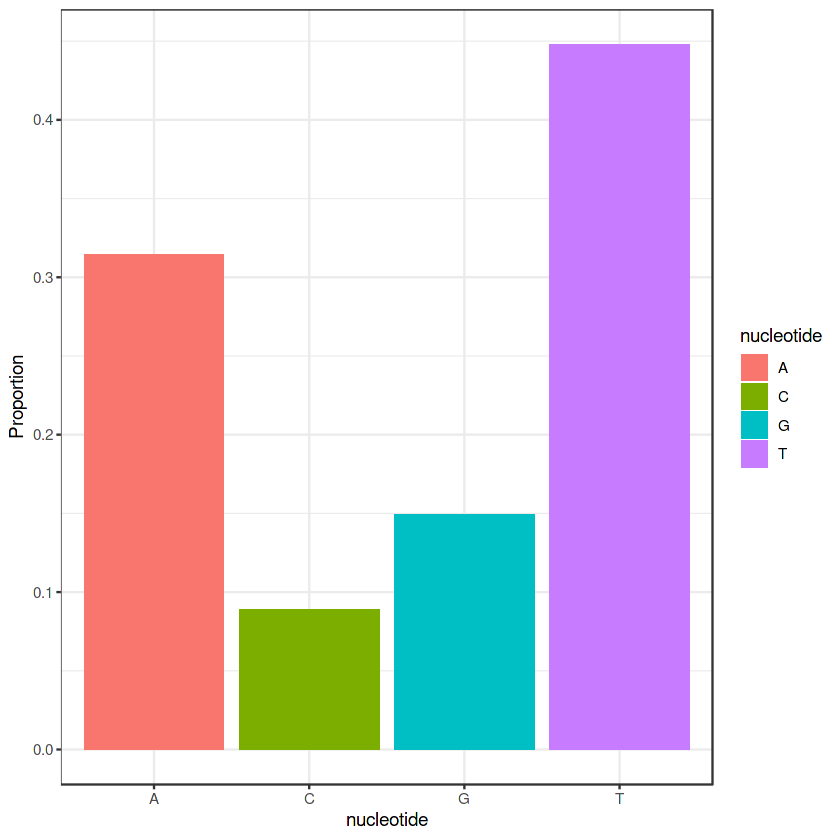

In [48]:
ggplot(letter_freqM_tibble, aes(x = nucleotide, y = Proportion, fill = nucleotide)) +
    geom_col() + 
    theme_bw() 

The nucleotides are certainly not uniformly distributed in the genome for chromosome M

In [38]:
# part 2
t(rmultinom(1, length(chrM), p = rep(1/4, 4)))

3450,3466,3405,3473


In [40]:
(expected_freq <- length(chrM)/4)

[1] 3448.5

In [50]:
# compute test statistic that measures how close 2 multinomial outputs to each other
oestat <- function(o, e) {
    sum((o-e)^2/e)
}
oe <- oestat(o = letter_freqM, e = length(chrM)/4)
oe

[1] 4386.634

In [52]:
# run simulation
n_simulation <- 10000
n <- length(chrM)

expected <- rep(n/4, 4)
oenull <- replicate(n_simulation, 
                   oestat(e = expected, o = rmultinom(1, n, p = rep(1/4, 4))))

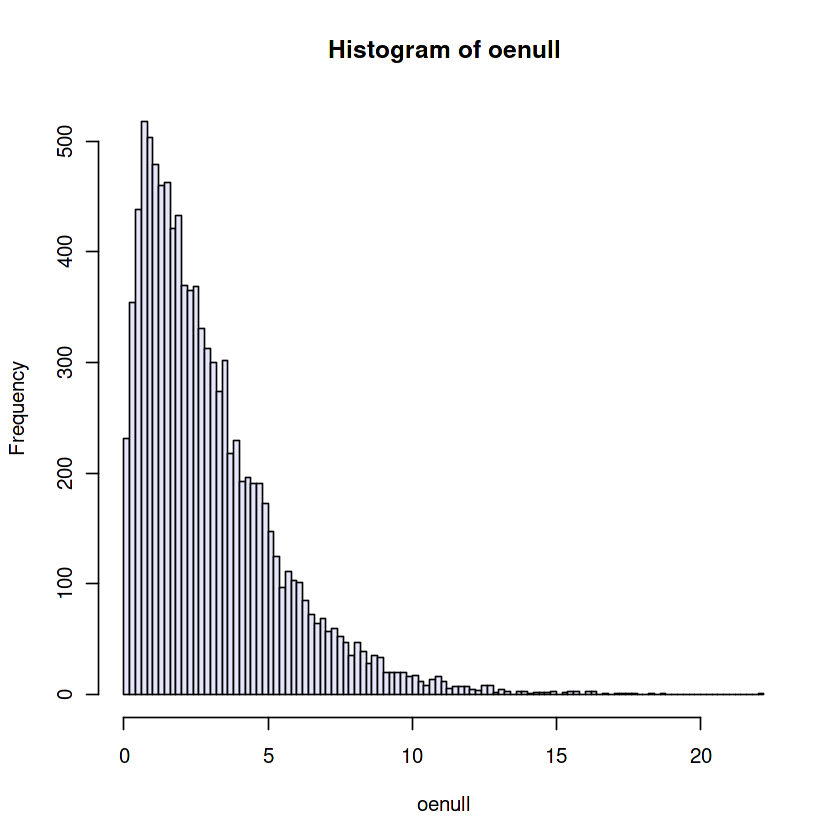

In [54]:
hist(oenull, breaks=100, col='lavender')

In [56]:
(q95 <- quantile(oenull, probs=0.95))


95% 
7.770074

Our OE is definitely larger than the 95th percentile of S0 -> reject null hypothesis